# Analysis of the online news popularity

## What is our data ?

Our data is composed by 61 attributes, including 58 predictive attributes, 2 non-predictive (url article, timedelta between publication and acquisition) and 1 goal field. What we are trying to predict is the number of shares the news will get based on the 58 predictive attributes.

## Download the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv', encoding='UTF-8')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Clean the data

In [3]:
#Remove space in columns name
data.columns = data.columns.str.strip()

data = data.drop(['url','timedelta'], axis=1)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
print(data.columns)

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

Here are all the columns, most of the column come from a precedent neural language processing that determined some features from the text, such as positive words, subjectivity, ...

## Plot some data

I will now change the columns (weekday_*) since it is 7 column that can be parsed in one categorical variable. I will do the same for the data_channel features

### Refactor the weekdays variables and data channels variables

In [5]:
data['weekday'] = "None"
data.loc[(data['weekday_is_monday'] == 1), 'weekday'] = 'Monday'
data.loc[(data['weekday_is_tuesday'] == 1), 'weekday'] = 'Tuesday'
data.loc[(data['weekday_is_wednesday'] == 1), 'weekday'] = 'Wednesday'
data.loc[(data['weekday_is_thursday'] == 1), 'weekday'] = 'Thursday'
data.loc[(data['weekday_is_friday'] == 1), 'weekday'] = 'Friday'
data.loc[(data['weekday_is_saturday'] == 1), 'weekday'] = 'Saturday'
data.loc[(data['weekday_is_sunday'] == 1), 'weekday'] = 'Sunday'

data = data.drop(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'], axis = 1)

data['channel_category'] = "None"
data.loc[(data['data_channel_is_lifestyle'] == 1), 'channel_category'] = 'Lifestyle'
data.loc[(data['data_channel_is_entertainment'] == 1), 'channel_category'] = 'Entertainment'
data.loc[(data['data_channel_is_bus'] == 1), 'channel_category'] = 'Bus'
data.loc[(data['data_channel_is_socmed'] == 1), 'channel_category'] = 'Socmed'
data.loc[(data['data_channel_is_tech'] == 1), 'channel_category'] = 'Tech'
data.loc[(data['data_channel_is_world'] == 1), 'channel_category'] = 'World'

data = data.drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'], axis = 1)

### Correlation matrix

In [6]:
import matplotlib.pyplot as plt

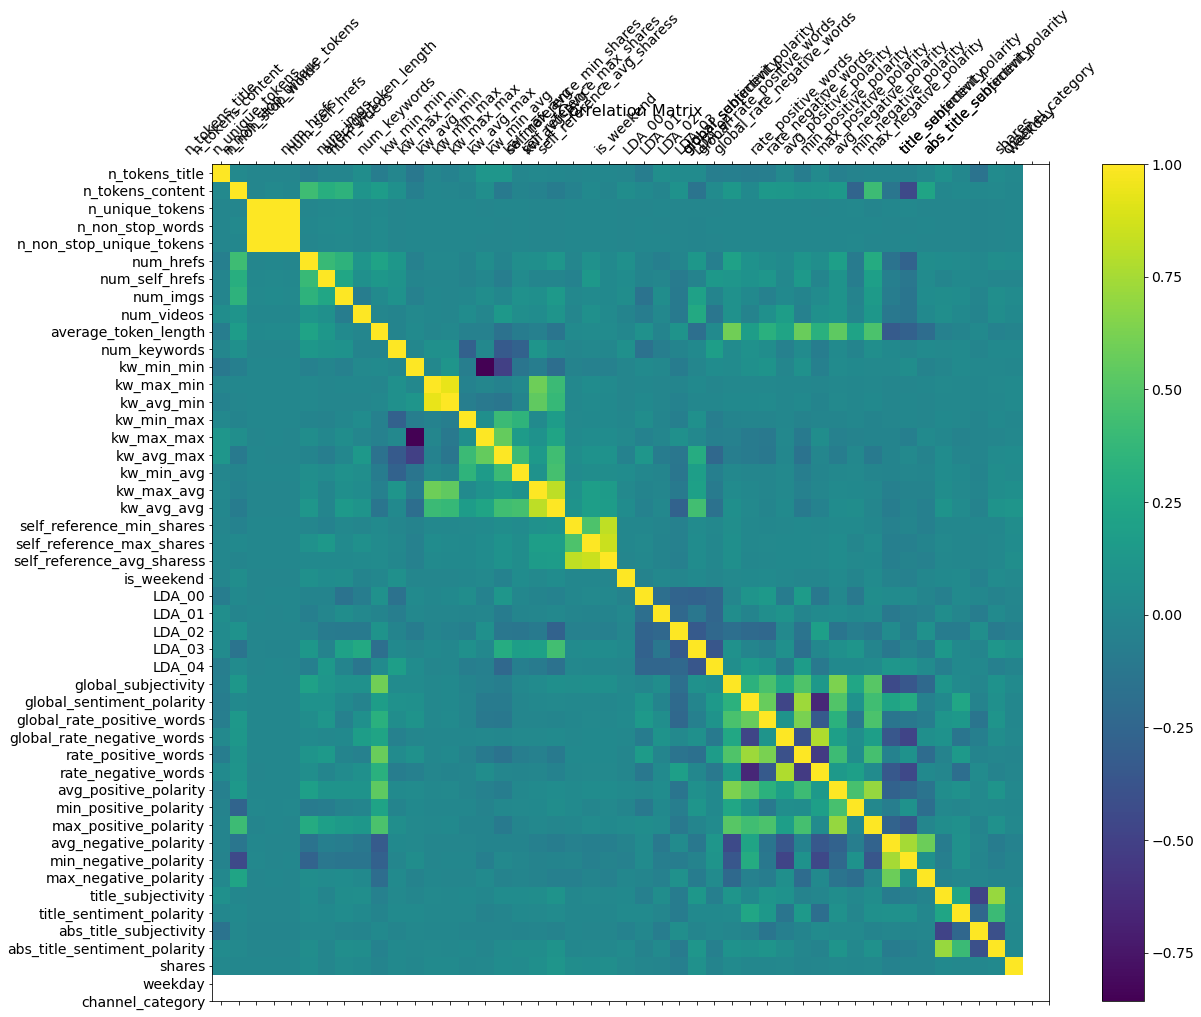

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


As we can see, the correlation matrix doesn't show that much correlation between the "share" variables and the others.

### Share category

Let's try to put the share number into category in order to plot them

In [8]:
new_column = []
for share_number in data["shares"]:
    if(share_number < 20):
        new_column.append("cat1")
    elif(share_number >= 20 and share_number < 1200):
        new_column.append("cat2")
    elif(share_number >= 1200 and share_number < 10000):
        new_column.append("cat3")
    else:#Greater than 10.000
        new_column.append("cat4")

data["share_category"] = new_column

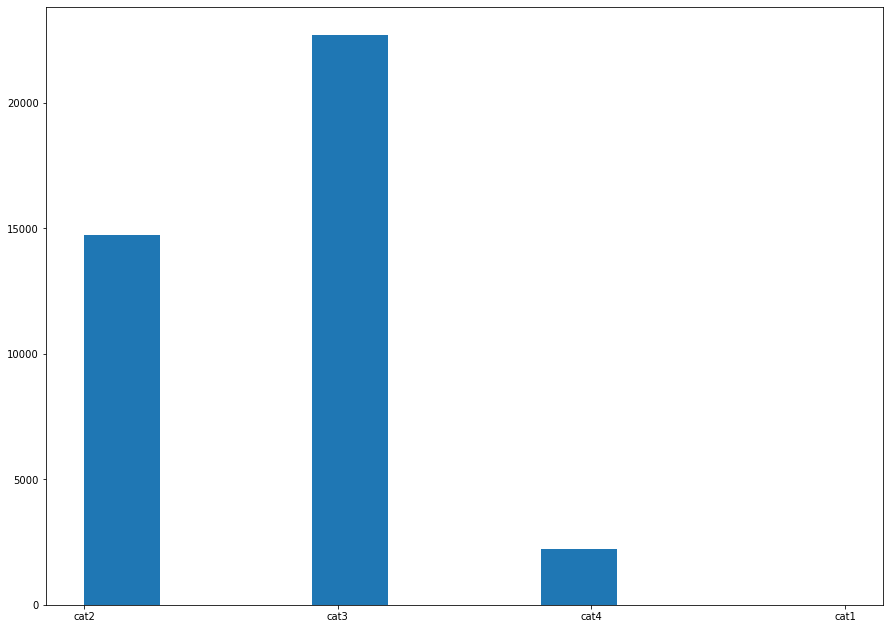

In [9]:
fig = plt.figure(figsize=(15,11))

plt.hist(data["share_category"])
plt.show()

Few articles are in cat 1 (less than 20 shares). The most populated category is the category 3 that mean that there is mostly between 1000 and 10000 shares on each article.

### Number of post on the week

I will plot the number of article posted over a week.

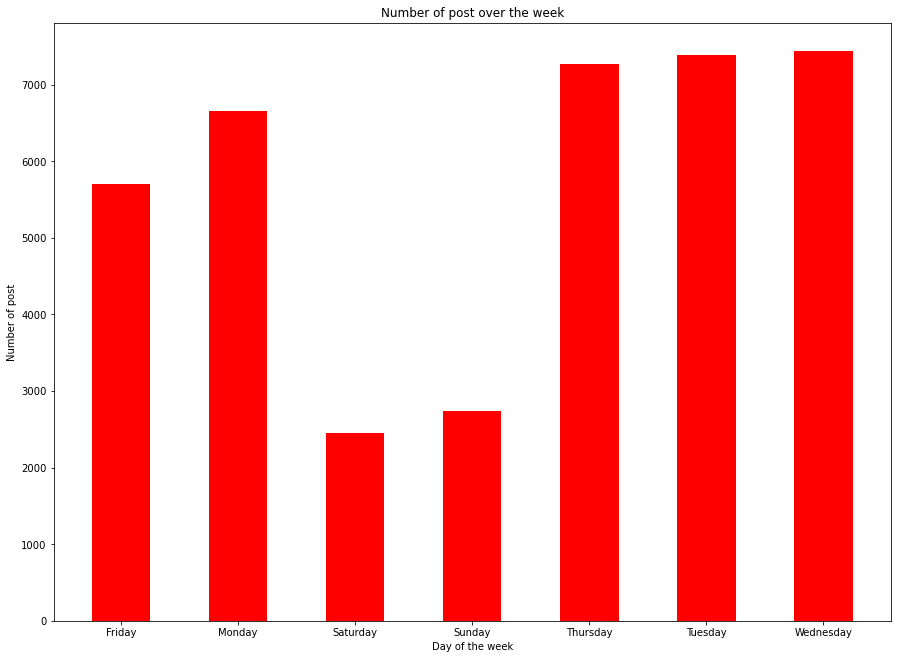

In [10]:
data_day_number = [i[0] for i in data.groupby("weekday").count().values]

fig = plt.figure(figsize=(15,11))
plt.bar(data.groupby("weekday").count().index.values, data_day_number, align="center", color = 'r', label = "Number of post", width = 0.5)

plt.title("Number of post over the week")
plt.xlabel("Day of the week")
plt.ylabel("Number of post")

plt.show()

As we can see, there is a big drop of publication during the weekend. Let's see how it impacts the share variable :)

### Mean shares over the week

There is a little spike of share on the weekend especially the saturday, I assume this is because peopple have more time to spend on their phone and sharing them with their friend.

I will now look the distribution of subject on the website.

### Proportion of subject between all subject

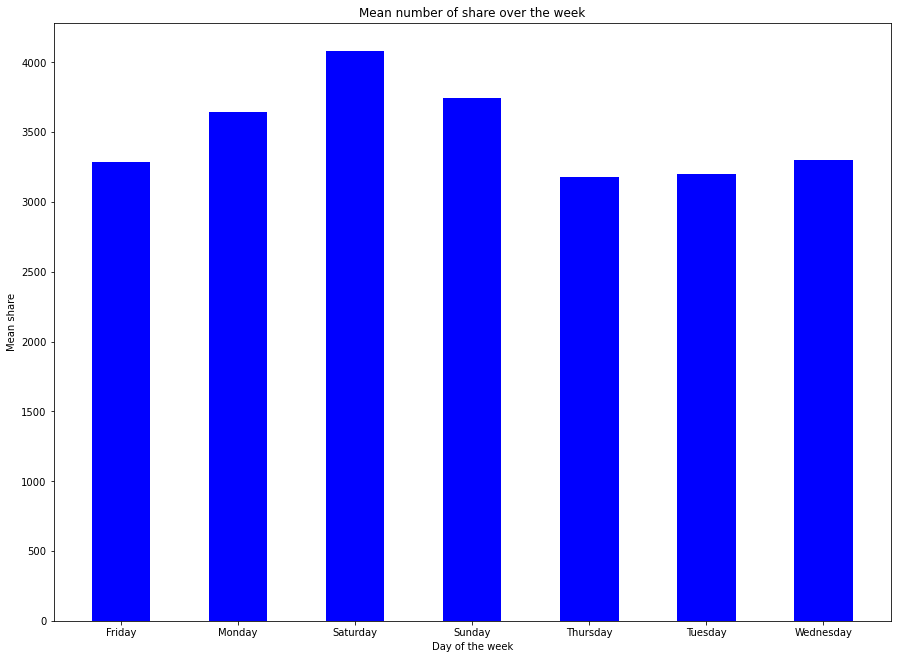

In [11]:
mean_share_day = [i[45] for i in data.groupby("weekday").mean().values]

fig = plt.figure(figsize=(15,11))
plt.bar(data.groupby("weekday").mean().index.values, mean_share_day, align="center", color = 'b', label = "Mean share", width = 0.5)

plt.title("Mean number of share over the week")
plt.xlabel("Day of the week")
plt.ylabel("Mean share")

plt.show()

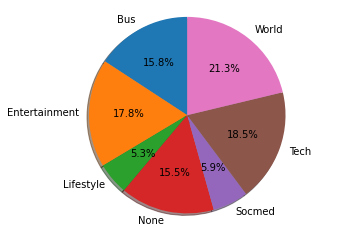

In [12]:
mean_share_day = [i[0] for i in data.groupby("channel_category").count().values]

labels = data.groupby("channel_category").count().index.values

fig1, ax1 = plt.subplots()
ax1.pie(mean_share_day, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Mean share over the article subject

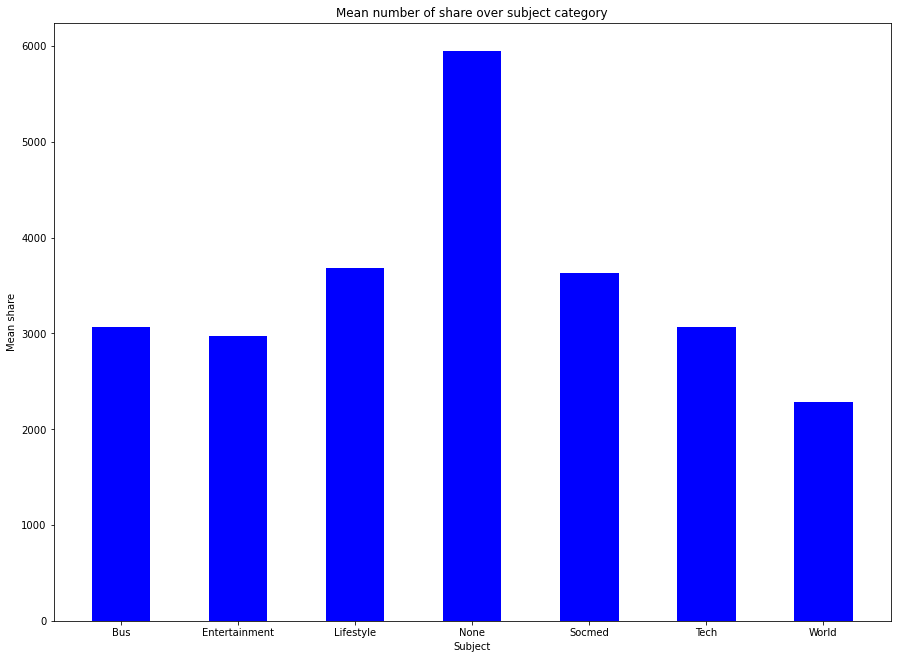

In [13]:
mean_share_day = [i[45] for i in data.groupby("channel_category").mean().values]

fig = plt.figure(figsize=(15,11))
plt.bar(data.groupby("channel_category").mean().index.values, mean_share_day, align="center", color = 'b', label = "Mean share", width = 0.5)

plt.title("Mean number of share over subject category")
plt.xlabel("Subject")
plt.ylabel("Mean share")

plt.show()

The none category received the most number of mean share. It can be explained by the fact that the None category is more wider than the others.

## Does the rate of positive word impact the share category ?

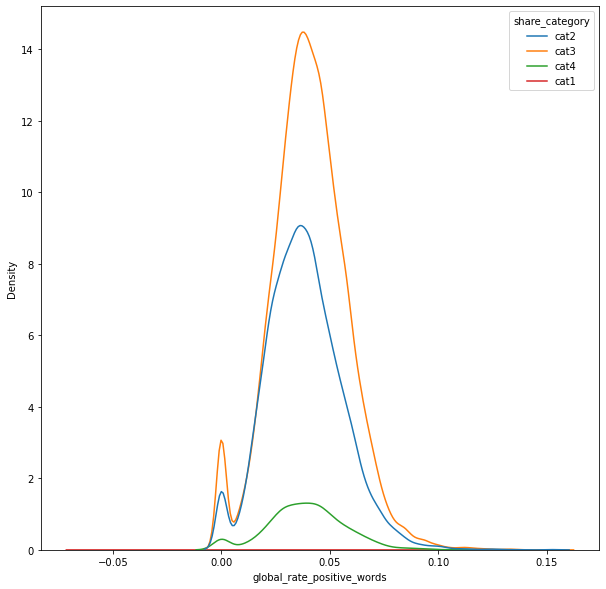

In [25]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.kdeplot(data=data, x='global_rate_positive_words', hue = 'share_category')

It doesn't look like it, because the density follow the number of article in the same category. What would have been a good breakthrough would have been a curve that is excentred from the others.

## Conclusion

From the data visualisation I have made, we can't really see the link between the days variables and the share variable. Same goes for the category subject of the article.

We will see in the modelisation part if the other variables are more significant but from what we have seen on the corr plot it doesn't seem like it.